In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('CarMPG.csv',sep=',',index_col=None)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
model = pd.DataFrame(df, columns = ['MPG', 'Acceleration'])

In [4]:
def compute_error_for_line_gn_points(c,m,points):
        total_error = 0
        for i in range(0,len(points)):
            x = points[i,2]
            y = points[i,1]
            total_error += (y-(m*x + c))**2
            
        return total_error/float(len(points))

In [5]:
def step_gradient(c_current,m_current,points,learningrate):
    c_gradient = 0
    m_gradient = 0
    n = float(len(points))
    for i in range(0,len(points)):
        x = points[i,2]
        y = points[i,1]
        c_gradient += -(2/n)*(y-((m_current*x) + c_current))
        m_gradient += -(2/n)*x*(y-((m_current*x) + c_current))
    
    new_c = c_current - (learningrate*c_gradient)
    new_m = m_current - (learningrate*m_gradient)
    return(new_c,new_m)

In [6]:
def gradient_descent_runner(points,starting_c,starting_m,learningrate,num_iterations):
    c = starting_c 
    m = starting_m
    for i in range(num_iterations):
        c,m=step_gradient(c,m,points,learningrate)
    return (c,m)

In [7]:
points = model
points = points.reset_index().values

In [8]:
#initial hyper parameters
learningrate = 0.0001
initial_c = 0
initial_m = 0
num_iterations = 10000

In [9]:
print('Starting Gradient Descent at c = (0),m={1},error={2}'.format(initial_c,initial_m,compute_error_for_line_gn_points(initial_c,initial_m,points)))

Starting Gradient Descent at c = (0),m=0,error=613.8712562814071


In [10]:
[c,m] = gradient_descent_runner(points,initial_c,initial_m,learningrate,num_iterations)

In [11]:
print("After {0} iterations c = {1}, m = {2}, error = {3}".format(num_iterations,c,m,compute_error_for_line_gn_points(c,m,points)))

After 10000 iterations c = 0.37924815239954346, m = 1.477159018865183, error = 50.81173993539931


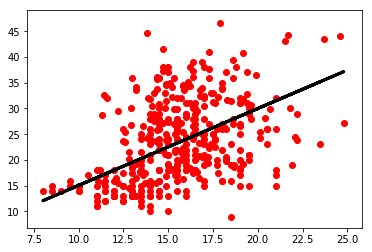

In [12]:
for i in range(0,len(points)):
    x = points[i,2]
    y = points[i,1]
    plt.scatter(x,y,color='red')

plt.plot(model.Acceleration,(1.4931509862180814*model.Acceleration + 0.122522331326687),color='black',linewidth=3)

50.8845836631
Observation - As the Number of Iteration ranges increases from zero, Error decreases from 600 - approx to 50.88 And then the rate of change in error is very minimal. It almost becomes an constant as shown in graph.


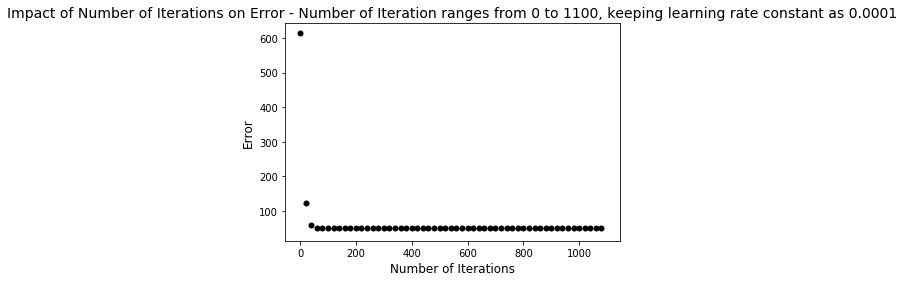

In [13]:
#Impact of Number of Iterations on Error
learningrate = 0.0001
initial_c = 0
initial_m = 0
num_iterations = 0

for num_iterations in range (0,1100,20):
    [c,m] = gradient_descent_runner(points,initial_c,initial_m,learningrate,num_iterations)
    plt.scatter(num_iterations,compute_error_for_line_gn_points(c,m,points),color='black',linewidth=.01)

print(compute_error_for_line_gn_points(c,m,points))
plt.title('Impact of Number of Iterations on Error - Number of Iteration ranges from 0 to 1100, keeping learning rate constant as 0.0001', fontsize=14)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Error', fontsize=12)
print('Observation - As the Number of Iteration ranges increases from zero, Error decreases from 600 - approx to 50.88 And then the rate of change in error is very minimal. It almost becomes an constant as shown in graph.')

Observation - As the Learning rate decreases from 0.01, Error increases from 50 approx to 600.


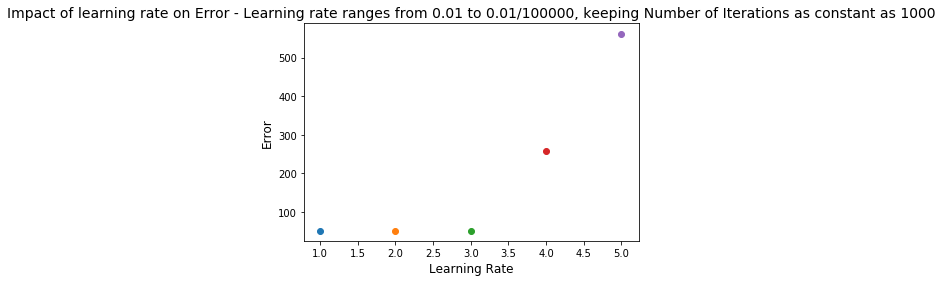

In [14]:
#Impact of learning rate on Error
learningrate = 0.01
initial_c = 0
initial_m = 0
num_iterations = 1000

for i in range(1,6):
    learningrate /= 10;
    [c,m] = gradient_descent_runner(points,initial_c,initial_m,learningrate,num_iterations)
    #print(learningrate,compute_error_for_line_gn_points(c,m,points))
    plt.scatter(i,compute_error_for_line_gn_points(c,m,points))
    
plt.title('Impact of learning rate on Error - Learning rate ranges from 0.01 to 0.01/100000, keeping Number of Iterations as constant as 1000', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Error', fontsize=12)
print('Observation - As the Learning rate decreases from 0.01, Error increases from 50 approx to 600.')